# Digitalização

No cenário atual onde os computadores digitais estão presentes em todos os aspectos das nossas vidas, não é estranho que microprocessadores sejam usados também em sistemas de controle automático. Neste capítulo vamos estudar de uma forma geral como isso pode ser feito.

## Amostras

A principal diferença entre o controle analógico com o qual temos trabalhado e o controle digital feito por microprocessadores é que os sinais passam a ser <b>amostrados</b> ou <b>discretos</b>.


Um sinal é discreto quando os únicos valores que importam são aqueles que ocorrem em um instante de tempo específico. Esses instantes denotam um domínio discreto, normalmente são múltiplos inteiros de uma constante real.

Função contínua: $x(t)=\cos (2\pi t)$. $t$ pode assumir qualquer valor real.

Função ou sinal discreto: $x[k] = \cos(0.2\pi k )$. $k$ só pode assumir valores inteiros. $k=0$, $\pm 1$, $\pm 2$, $\ldots$. 

Essa distinção é necessária porque os computadores digitais trabalham de forma síncrona e discreta: as tarefas só são realizadas em instantes específicos de tempo, que são cronometrados pelo relógio (clock) do processador: na subida ou na descida do clock.

Entre um clock e outro, o computador não executa nenhuma ação e os sinais são "segurados" em um valor constante (ou simplesmente consideramos que seja zero).

Graficamente, representamos sinais contínuos por uma linha cheia. Sinais discretos representamos apenas pelos pontos correspondentes às amostras (as linhas verticais são apenas ilustrativas). 

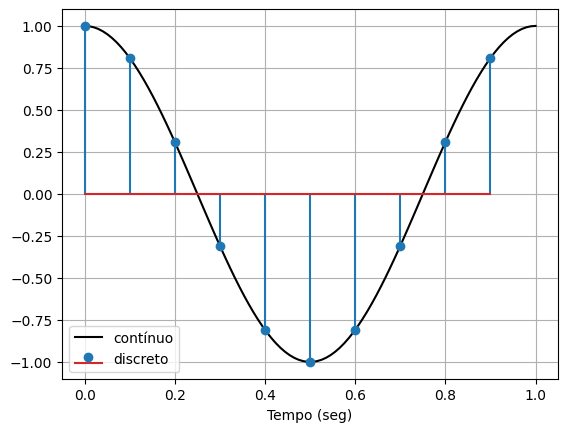

In [14]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(0,1,100)
x = np.cos(2*np.pi*t)
T = 0.1
k = np.arange(10)
xs = np.cos(2*np.pi*k*T)
plt.plot(t,x,'k',label='contínuo')
plt.stem(k*T,xs,label='discreto')
plt.xlabel('Tempo (seg)')
plt.legend()
plt.grid()
plt.show()



O gráfico acima representa a função $\cos(2\pi t)$ contínua e discretizada. A linha preta cheia é o sinal analógico. Ele existe para qualquer instante de tempo, por exemplo $t=\sqrt{2}$, $t=1/9$. A função denotada por pontos circulares azuis é a versão discreta da mesma função. Observe que os valores do eixo Y são os mesmos do sinal analógico. Porém, as linhas azuis só ocorrem nos instantes $0.1$, $0.2$, etc. Todos são múltiplos inteiros de $0.1$ segundos. 

Um sinal discreto é muito mais simples de representar no computador. Basta armazenar as amostras em um vetor. O sinal representado acima foi gerado em Python e consiste das seguintes amostras.

In [12]:
x.round(2)

array([ 1.  ,  1.  ,  0.99,  0.98,  0.97,  0.95,  0.93,  0.9 ,  0.87,
        0.84,  0.81,  0.77,  0.72,  0.68,  0.63,  0.58,  0.53,  0.47,
        0.42,  0.36,  0.3 ,  0.24,  0.17,  0.11,  0.05, -0.02, -0.08,
       -0.14, -0.2 , -0.27, -0.33, -0.39, -0.44, -0.5 , -0.55, -0.61,
       -0.65, -0.7 , -0.75, -0.79, -0.82, -0.86, -0.89, -0.92, -0.94,
       -0.96, -0.98, -0.99, -1.  , -1.  , -1.  , -1.  , -0.99, -0.98,
       -0.96, -0.94, -0.92, -0.89, -0.86, -0.82, -0.79, -0.75, -0.7 ,
       -0.65, -0.61, -0.55, -0.5 , -0.44, -0.39, -0.33, -0.27, -0.2 ,
       -0.14, -0.08, -0.02,  0.05,  0.11,  0.17,  0.24,  0.3 ,  0.36,
        0.42,  0.47,  0.53,  0.58,  0.63,  0.68,  0.72,  0.77,  0.81,
        0.84,  0.87,  0.9 ,  0.93,  0.95,  0.97,  0.98,  0.99,  1.  ,
        1.  ])

## Conversor A/D

O conversor Analógico-Digital (A/D) é um elemento conceitual que converte um sinal contínuo no tempo para um sinal discreto no tempo. 

Na prática ele é implementado como um circuito de chaveamento: a chave fecha para coletar o sinal e abre até que o próximo clock mande coletar outra amostra. 

Existe uma [variedade](https://dewesoft.com/daq/types-of-adc-converters) grande de conversores A/D. A maioria está disponível em um chip eletrônico convencional que pode ser controlado por um microprocessador. Contudo, o mais comum é despachar o microprocessador e o conversor A/D em um único chip, que na prática é o que chamamos de microcontrolador.

Nosso escopo aqui não é discutir os circuitos de conversão, isso fica para as aulas de eletrônica. No entanto, precisamos entender os efeitos dele no sistema de controle.

O principal efeito é a discretização do sinal, o que produz atraso na malha de controle. 

Outro efeito secundário é a introdução de erro na medição, porque a representação digital sempre arredonda valores para que o computador possa fazer as contas. Essa é a discretização de amplitude. Você deve ter aprendido isso em Eletrônica Digital. Ela também é importante, mas neste curso não vamos analisar seus efeitos, porque a maioria dos conversores usam uma resolução elevada (10 bits, pelo menos) e isso normalmente é mais que suficiente para desprezarmos os efeitos na maioria dos processos de controle realimentado. 

## Período de amostragem

É o menor intervalo de tempo entre uma amostra e outra, supondo que elas sejam coletadas sempre no mesmo intervalo. 

O inverso do período de amostragem é chamado de *taxa de amostragem* é medida em amostras por segundo, ou ciclos por segundo, cuja unidade típica é Hertz.

$$
\begin{align}
    f = \frac{1}{T}\quad\quad \text{(Hertz)}
\end{align}
$$

Um sistema que coleta uma amostra de um sinal a cada $0.001$ segundos possui período de amostragem de $1$ milissegundo e uma taxa de amostragem de 1 kilo Hertz.

Existem sistemas de conversão A/D que trabalham com período de amostragem variável, mas não será o caso que vamos estudar neste curso.

Quanto menor o período de amostragem "mais fiel" o sinal amostrado será ao sinal contínuo (isso depende da resolução também). No entanto, quando mais "rápida" essa amostragem é, mais caro o conversor fica, tando economicamente (chips mais rápidos custam mais dinheiro) quanto do ponto de vista de energia, pois circuitos que chaveiam muito esquentam demais. 

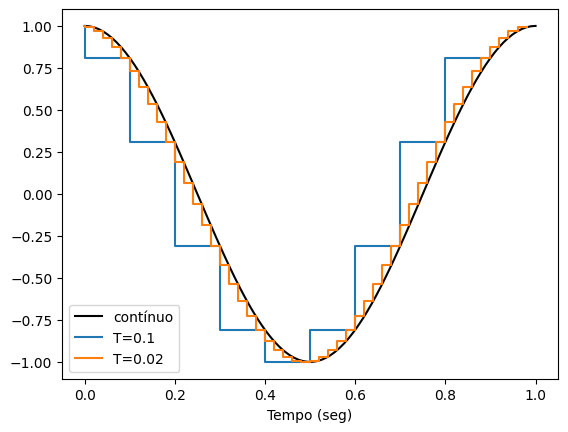

In [13]:
t = np.linspace(0,1,100)
x = np.cos(2*np.pi*t)
T1 = 0.1
k1 = np.arange(10)
xs1 = np.cos(2*np.pi*k1*T1)
T2 = 0.02
k2 = np.arange(int(1/T2))
xs2 = np.cos(2*np.pi*k2*T2)
plt.plot(t,x,'k',label='contínuo')
plt.step(k1*T1,xs1,label=f'T={T1}')
plt.step(k2*T2,xs2,label=f'T={T2}')
plt.xlabel('Tempo (seg)')
plt.legend()
plt.show()


Note que o período de amostragem não é necessariamente o clock do processador, porque às vezes o processador trabalha mais rápido do que o nosso sistema precisa. Por exemplo, sistemas de temperatura normalmente são lentos, e não é raro eles terem período de amostagem de 1 ou mais segundos. Para um Arduino, entretanto, cujo clock é 16 MHz, 1 segundo equivale a vários clocks. Tudo isso é controlável pelo projetista.

Para "baratear" nosso sistema, então, podemos escolher processadores mais lentos. Mas ele não pode haver exagero. Se ele for lento demais, o conversor A/D não conseguirá "perceber" as mudanças significativas do sinal, ou seja, informação será perdida. Se não tivermos informação, o controle não tem como funcionar.

Há um critério matemático que estabelece qual a mínima taxa de amostragem que devemos usar para uma dada situação; é o teorema da amostragem de Shannon-Nyquist. Vamos discutí-lo posteriormente.

## Sistemas de controle digital

A figura 8.1 mostra como funciona conceitualmente um sistema de controle digital, em relação a um sistema equivalente analógico.
<p align="center">
    <img src="Fig8.1.svg">
</p>

O que está acontecendo?
 - O sinal analógico do sensor $y(t)$ é convertido em um sinal discreto $y(kT)$, através do amostrador e do circuito A/D
 - O sinal de referência é agora um sinal discreto $r(kT)$, gerado dentro do controlador digital. 
 - O sinal de controle $u(kT)$ é calculado no programa do controlador através de uma equação de diferenças, e não mais por um circuito analógico
 - O sinal de controle $u(kT)$ é convertido para um sinal analógico $u(t)$ pelo conversor D/A + segurador, antes de ir de volta para a planta. 

A principal desvantagem do controle digital é o atraso nos sinais devido ao procedimento de amostragem e conversão. 

<p align="center">
    <img src="Fig8.2.svg">
</p>

A informação entre uma amostra e outra é perdida. Essa perda faz com que o controle trabalhe sempre com uma informação atrasada. Se o controlador digital fosse um circuito analógico, esse atraso seria equivalente a uma perda pura de tempo de aproximadamente $T/2$
